# Hotel California Project

**This project was developed by** <br> 

António Oliveira - 20211595 <br>
David Martins - r202021628 <br>
Inês Graça - 20211598

## Dataset and Packages

### Importing Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

#sklearn packages
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder, MinMaxScaler, RobustScaler, StandardScaler
from sklearn.model_selection import train_test_split

# chi-square
import scipy.stats as stats
from scipy.stats import chi2_contingency

#models
from sklearn.linear_model import LogisticRegression, LassoCV, LinearRegression, SGDClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn import svm
from sklearn.datasets import make_classification

#Grid Search
from sklearn.model_selection import GridSearchCV

#feature_selection
from sklearn.feature_selection import mutual_info_classif, mutual_info_regression, chi2, f_regression, SelectKBest, RFE

#performance metrics
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score, classification_report, mean_squared_error, mean_absolute_error, r2_score

#warnings
import warnings
warnings.filterwarnings('ignore')

# profile report
# !pip install pandas-profiling
from pandas_profiling import ProfileReport

### Importing and Visualizing the dataset

In [2]:
hotel_train = pd.read_csv('train.csv', index_col=0)
hotel_test = pd.read_csv('test.csv', index_col=0)

pd.set_option('display.max_columns', None)

hotel_train

,ArrivalYear,ArrivalMonth,ArrivalWeekNumber,ArrivalDayOfMonth,ArrivalHour,WeekendStays,WeekdayStays,Adults,Children,Babies,FirstTimeGuest,AffiliatedCustomer,PreviousReservations,PreviousStays,PreviousCancellations,DaysUntilConfirmation,OnlineReservation,BookingChanges,BookingToArrivalDays,ParkingSpacesBooked,SpecialRequests,PartOfGroup,CompanyReservation,OrderedMealsPerDay,FloorReserved,FloorAssigned,DailyRateEuros,DailyRateUSD,%PaidinAdvance,CountryofOriginAvgIncomeEuros (Year-2),CountryofOriginAvgIncomeEuros (Year-1),CountryofOriginHDI (Year-1),Canceled
BookingID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
10423,2016,3,13,21,18.00,1,2,2,0,0,1,0,0,0,0,0,1,0,45,0,0,0,1,1,6,3,85.00,84.1500,0.0,40141.59,40833.24,0.898,0
14038,2016,4,17,23,16.00,2,4,2,2,0,1,0,0,0,0,0,1,0,2,0,0,0,1,1,1,1,206.00,203.9400,0.0,7199.25,7096.60,0.572,1
37179,2016,12,53,28,16.00,0,1,2,0,0,1,0,0,0,0,0,1,0,14,0,1,0,1,1,6,6,138.00,136.6200,0.0,28742.44,29668.86,0.842,1
15019,2016,4,18,30,15.25,2,5,2,0,0,1,0,0,0,0,0,1,2,98,0,0,0,1,1,6,6,109.81,108.7119,0.0,28742.44,29668.86,0.842,0
30385,2016,5,21,17,15.50,0,2,2,0,0,1,0,0,0,0,0,0,1,64,0,0,0,1,1,6,5,140.00,138.6000,0.0,28742.44,29668.86,0.842,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23233,2016,2,6,4,21.25,0,2,1,0,0,1,0,0,0,0,0,1,0,76,0,0,0,1,1,6,6,62.10,61.4790,0.0,28742.44,29668.86,0.842,1
32833,2016,7,28,8,16.75,0,1,2,2,0,1,0,0,0,0,0,1,1,173,0,2,0,1,1,1,1,168.30,166.6170,0.0,36194.87,36909.33,0.876,1
30966,2016,2,6,6,16.00,2,6,2,0,0,1,0,0,0,0,0,1,0,9,0,1,0,1,0,6,6,62.58,61.9542,0.0,49233.22,50302.07,0.926,0


## Data Exploration

In [3]:
hotel_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13938 entries, 10423 to 24861
Data columns (total 33 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   ArrivalYear                             13938 non-null  int64  
 1   ArrivalMonth                            13938 non-null  int64  
 2   ArrivalWeekNumber                       13938 non-null  int64  
 3   ArrivalDayOfMonth                       13938 non-null  int64  
 4   ArrivalHour                             13938 non-null  float64
 5   WeekendStays                            13938 non-null  int64  
 6   WeekdayStays                            13938 non-null  int64  
 7   Adults                                  13938 non-null  int64  
 8   Children                                13938 non-null  int64  
 9   Babies                                  13938 non-null  int64  
 10  FirstTimeGuest                          13938 non-null

In [4]:
hotel_train.describe().T

,count,mean,std,min,25%,50%,75%,max
ArrivalYear,13938.0,2016.000000,0.000000,2016.000,2016.000000,2016.000,2016.000,2016.000
ArrivalMonth,13938.0,6.854498,3.175421,1.000,4.000000,7.000,10.000,12.000
ArrivalWeekNumber,13938.0,28.851413,13.901656,1.000,17.000000,29.000,41.000,53.000
ArrivalDayOfMonth,13938.0,15.888148,8.850454,1.000,8.000000,16.000,24.000,31.000
ArrivalHour,13938.0,18.874121,2.884563,14.000,16.250000,19.000,21.250,23.750
WeekendStays,13938.0,0.882695,0.945422,0.000,0.000000,1.000,2.000,14.000
WeekdayStays,13938.0,2.292510,1.735639,0.000,1.000000,2.000,3.000,35.000
Adults,13938.0,1.885852,0.547217,0.000,2.000000,2.000,2.000,4.000
Children,13938.0,0.141627,0.452717,0.000,0.000000,0.000,0.000,3.000
Babies,13938.0,0.006959,0.116244,0.000,0.000000,0.000,0.000,10.000


### Profile Report

In [5]:
# instalation of ProfilingReport in the end of the imports cell
#profile = ProfileReport(hotel_train,
#                        title='MPG Pandas Profiling Report',
#                        explorative=True)
#profile

### Looking for Inconsistencies and unlikely values

In [6]:
hotel_train['Babies'].value_counts()

0     13851
1        85
2         1
10        1
Name: Babies, dtype: int64

In [7]:
hotel_train.loc[(hotel_train['Babies'] == 10), : ]

,ArrivalYear,ArrivalMonth,ArrivalWeekNumber,ArrivalDayOfMonth,ArrivalHour,WeekendStays,WeekdayStays,Adults,Children,Babies,FirstTimeGuest,AffiliatedCustomer,PreviousReservations,PreviousStays,PreviousCancellations,DaysUntilConfirmation,OnlineReservation,BookingChanges,BookingToArrivalDays,ParkingSpacesBooked,SpecialRequests,PartOfGroup,CompanyReservation,OrderedMealsPerDay,FloorReserved,FloorAssigned,DailyRateEuros,DailyRateUSD,%PaidinAdvance,CountryofOriginAvgIncomeEuros (Year-2),CountryofOriginAvgIncomeEuros (Year-1),CountryofOriginHDI (Year-1),Canceled
BookingID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
28739,2016,1,3,12,19.5,0,2,2,0,10,1,0,0,0,0,0,1,1,37,0,1,0,1,1,3,3,84.45,83.6055,0.0,28742.44,29668.86,0.842,0


In [8]:
hotel_train['PreviousReservations'].value_counts()

0     13495
1       182
2        44
3        36
4        25
5        21
6        16
7        12
8        10
10        8
12        8
16        7
9         7
11        6
14        6
15        4
26        3
24        3
18        3
22        3
33        3
17        3
23        3
53        2
31        2
29        2
21        2
13        2
27        2
28        2
20        2
25        2
36        1
51        1
45        1
50        1
34        1
49        1
41        1
46        1
48        1
40        1
32        1
47        1
Name: PreviousReservations, dtype: int64

In [9]:
hotel_train['DaysUntilConfirmation'].value_counts() 

0      13775
63        24
15        12
98         8
178        6
4          6
34         6
1          5
176        5
44         4
41         4
31         4
56         4
46         3
101        3
43         3
96         3
39         3
48         3
147        3
11         3
8          3
93         2
61         2
20         2
187        2
107        2
80         2
50         2
224        2
42         2
25         2
3          2
27         2
71         1
40         1
55         1
6          1
160        1
9          1
38         1
30         1
22         1
14         1
91         1
85         1
193        1
99         1
77         1
69         1
2          1
45         1
21         1
60         1
10         1
12         1
74         1
111        1
Name: DaysUntilConfirmation, dtype: int64

In [10]:
hotel_train['AffiliatedCustomer'].value_counts()

0    13868
1       70
Name: AffiliatedCustomer, dtype: int64

In [11]:
hotel_train['BookingChanges'].value_counts()

0     11806
1      1408
2       518
3       115
4        49
5        16
6        11
7         5
8         3
13        2
15        2
17        1
21        1
14        1
Name: BookingChanges, dtype: int64

In [12]:
hotel_train.loc[(hotel_train['BookingChanges'] == 21), : ]

,ArrivalYear,ArrivalMonth,ArrivalWeekNumber,ArrivalDayOfMonth,ArrivalHour,WeekendStays,WeekdayStays,Adults,Children,Babies,FirstTimeGuest,AffiliatedCustomer,PreviousReservations,PreviousStays,PreviousCancellations,DaysUntilConfirmation,OnlineReservation,BookingChanges,BookingToArrivalDays,ParkingSpacesBooked,SpecialRequests,PartOfGroup,CompanyReservation,OrderedMealsPerDay,FloorReserved,FloorAssigned,DailyRateEuros,DailyRateUSD,%PaidinAdvance,CountryofOriginAvgIncomeEuros (Year-2),CountryofOriginAvgIncomeEuros (Year-1),CountryofOriginHDI (Year-1),Canceled
BookingID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
17712,2016,3,11,11,14.0,14,35,0,0,0,1,0,0,0,0,0,0,21,16,0,0,0,1,1,6,-1,0.0,0.0,0.0,28742.44,29668.86,0.842,0


### Removing Features that are always the same

In [13]:
hotel_train.drop(['CompanyReservation', 'ArrivalYear'], axis=1, inplace=True)
hotel_test.drop(['CompanyReservation', 'ArrivalYear'], axis=1, inplace=True)

## Preparing the data for Classification

### Separating Dependent and Independent Features

In [14]:
X = hotel_train.drop(['Canceled'], axis=1)
y = hotel_train['Canceled']

### Performing a separation between training and validation data

In [15]:
X_train, X_val, y_train, y_val = train_test_split(X,
                                                  y,
                                                  test_size=0.25,
                                                  random_state=42,
                                                  shuffle=True,
                                                  stratify=y)

### Split between Categorical and Numerical features

In [16]:
num_features = [
    'ArrivalMonth', 'ArrivalWeekNumber', 'ArrivalDayOfMonth', 'ArrivalHour',
    'WeekendStays', 'WeekdayStays', 'PreviousReservations', 'PreviousStays',
    'PreviousCancellations', 'DaysUntilConfirmation', 'BookingChanges',
    'BookingToArrivalDays', 'SpecialRequests', 'FloorReserved',
    'FloorAssigned', 'DailyRateEuros', 'DailyRateUSD',
    'CountryofOriginAvgIncomeEuros (Year-2)',
    'CountryofOriginAvgIncomeEuros (Year-1)', 'CountryofOriginHDI (Year-1)'
]
categ_features = [
    'Adults', 'Children', 'Babies', 'FirstTimeGuest', 'AffiliatedCustomer',
    'OnlineReservation', 'ParkingSpacesBooked', 'PartOfGroup',
    'OrderedMealsPerDay', '%PaidinAdvance'
]

## Feature Selection

### Numeric Features

#### Data Scaling

In [17]:
# scaler chosen
choosen_scaler = MinMaxScaler()
# RobustScaler()
# StandardScaler()

# apply same transformation for train data
X_train[num_features] = choosen_scaler.fit_transform(X_train[num_features])


# apply same transformation for validation data
X_val[num_features] = choosen_scaler.transform(X_val[num_features])


hotel_test[num_features] = choosen_scaler.transform(hotel_test[num_features])

#### Performing Spearman's Correlation

In [18]:
def cor_heatmap(cor):
    plt.figure(figsize=(12, 10))
    sns.heatmap(data=cor, annot=True, cmap=plt.cm.Blues, fmt='.1')
    plt.show()

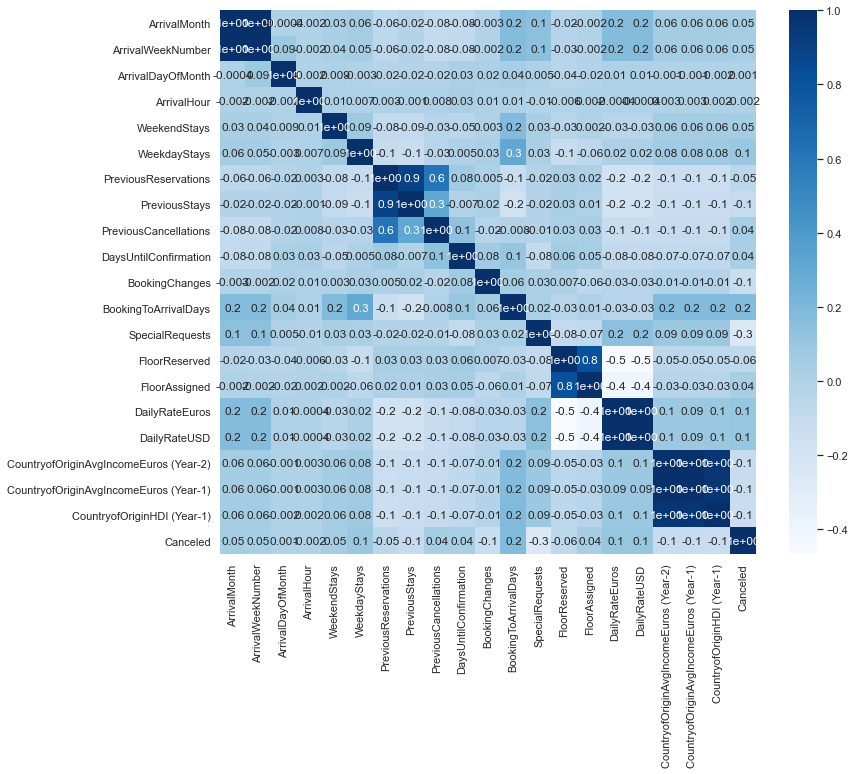

In [19]:
cor_spearman = X_train[num_features].join(other=y_train).corr(
    method='spearman')
cor_heatmap(cor_spearman)

Overall there are **low** correlations between all numeric features and the target (Cancelled). However, there are some features that are highly correlated between themselves, like *CountryOfOriginAverageIncomeEuros (Year-2)*, *CountryOfOriginAverageIncomeEuros (Year-1)* and *CountryOfOriginHDI (Year-1)*, as well as *ArrivalWeekNumber* and *ArrivalWeekMonth*. In addition to these, *DailyRateEuros* and *DailyRateUSD* also have a really high correlation.

#### Performing Lasso Regression

In [20]:
# fit regression
reg = LassoCV().fit(X_train[num_features], y_train)
# get coefficients
coef = pd.Series(reg.coef_, index=X_train[num_features].columns)

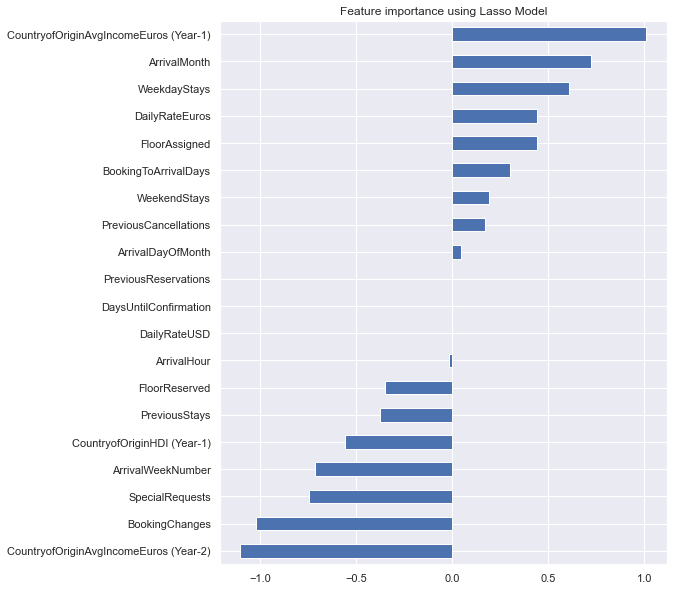

In [21]:
def plot_importance(coef, name):
    imp_coef = coef.sort_values()
    plt.figure(figsize=(8, 10))
    imp_coef.plot(kind="barh")
    plt.title("Feature importance using " + name + " Model")
    plt.show()


plot_importance(coef, 'Lasso')

According to Lasso, *DailyRateUSD*, *DaysUntilConfirmation*, *PreviousReservations* and *ArrivalHour* can be removed.

#### Performing Recursive Feature Selection (RFE)

In [22]:
# Choosing the Number of feaures
nof_list = np.arange(1, 20)
high_score = 0
# Variable to store the optimum features
nof = 0
score_list = []
for n in range(len(nof_list)):
    model = DecisionTreeClassifier()
    rfe = RFE(model, n_features_to_select=nof_list[n])
    X_train_rfe = rfe.fit_transform(X_train[num_features], y_train)
    X_val_rfe = rfe.transform(X_val[num_features])
    model.fit(X_train_rfe, y_train)

    score = model.score(X_val_rfe, y_val)
    score_list.append(score)

    if (score > high_score):
        high_score = score
        nof = nof_list[n]
print("Optimum number of features: %d" % nof)
print("Score with %d features: %f" % (nof, high_score))

Optimum number of features: 19
Score with 19 features: 0.689240


In [23]:
model = DecisionTreeClassifier()
rfe = RFE(estimator=model, n_features_to_select=18)
X_rfe = rfe.fit_transform(X=X_train[num_features], y=y_train)
selected_features = pd.Series(rfe.support_,
                              index=X_train[num_features].columns)
selected_features

ArrivalMonth                               True
ArrivalWeekNumber                          True
ArrivalDayOfMonth                          True
ArrivalHour                                True
WeekendStays                               True
WeekdayStays                               True
PreviousReservations                       True
PreviousStays                             False
PreviousCancellations                      True
DaysUntilConfirmation                     False
BookingChanges                             True
BookingToArrivalDays                       True
SpecialRequests                            True
FloorReserved                              True
FloorAssigned                              True
DailyRateEuros                             True
DailyRateUSD                               True
CountryofOriginAvgIncomeEuros (Year-2)     True
CountryofOriginAvgIncomeEuros (Year-1)     True
CountryofOriginHDI (Year-1)                True
dtype: bool

According to RFE; only *PreviousReservations* can be removed.

### Categorical Data

#### Chi-Squared and Mutual Criterion Test

In [24]:
# Chi-square test
threshold = 6
high_score_features_chi2 = []
scores = []
names_Chi2 = []

feature_scores = SelectKBest(chi2, k=threshold).fit(
    X_train[categ_features], y_train).scores_

high_score_features = []
for score, f_name in sorted(zip(feature_scores, X_train[categ_features].columns), reverse=True)[:threshold]:
    high_score_features_chi2.append(f_name)
    scores.append(score)
    names_Chi2.append(f_name)
    

#MIC 
threshold = 6
high_score_features_MIC = []
scores = []
names_MIC = []
feature_scores = mutual_info_classif(X_train[categ_features],y_train, random_state=0)
for score, f_name in sorted(zip(feature_scores, X_train[categ_features].columns), reverse=True)[:threshold]:
        high_score_features_MIC.append(f_name)
        scores.append(score)
        names_MIC.append(f_name)
        

# intersection of the features chosen by both this models
common_categ_features = list(set(names_Chi2).intersection(list(names_MIC)))

print(common_categ_features)

['Children', 'AffiliatedCustomer', 'OnlineReservation', 'ParkingSpacesBooked']


With the chosen threshold, only ['Children', 'ParkingSpacesBooked', 'OnlineReservation', 'AffiliatedCustomer'] are important.

#### Independence Test

In [25]:
def TestIndependence(X, y, var, alpha=0.05):
    dfObserved = pd.crosstab(y, X)
    chi2, p, dof, expected = stats.chi2_contingency(dfObserved.values)
    dfExpected = pd.DataFrame(expected,
                              columns=dfObserved.columns,
                              index=dfObserved.index)
    if p < alpha:
        result = "{0} is IMPORTANT for Prediction".format(var)
    else:
        result = "{0} is NOT an important predictor. (Discard {0} from model)".format(
            var)
    print(result)


for var in X_train[categ_features]:
    TestIndependence(X_train[var], y_train, var)

Adults is IMPORTANT for Prediction
Children is IMPORTANT for Prediction
Babies is IMPORTANT for Prediction
FirstTimeGuest is IMPORTANT for Prediction
AffiliatedCustomer is IMPORTANT for Prediction
OnlineReservation is IMPORTANT for Prediction
ParkingSpacesBooked is IMPORTANT for Prediction
PartOfGroup is IMPORTANT for Prediction
OrderedMealsPerDay is IMPORTANT for Prediction
%PaidinAdvance is IMPORTANT for Prediction


Following the results of the Independence Test, **all features** are important for prediction.

### Final Features




**Numerical Data**

| Predictor | Spearman | Lasso | RFE | What to do? | 
| --- | --- | --- | --- | --- |
| ArrivalMonth | KEEP | KEEP | KEEP | KEEP |
| ArrivalWeekNumber | Drop | KEEP | KEEP | KEEP | 
| ArrivalDayOfMonth | KEEP | ? | KEEP | *try* |
| ArrivalHour | Drop | Drop | KEEP | Drop | 
| WeekendStays | KEEP | KEEP | KEEP | KEEP | 
| WeekdayStays | KEEP | KEEP | KEEP | KEEP | 
| PreviousReservations | Drop | Drop | KEEP | Drop | 
| PreviousStays | KEEP | KEEP | KEEP | KEEP | 
| PreviousCancellations | KEEP | KEEP | KEEP | KEEP | 
| DaysUntilConfirmation | Drop | Drop | Drop | Drop | 
| BookingChanges | KEEP | KEEP | KEEP | KEEP | 
| BookingToArrivalDays | KEEP | KEEP | KEEP | KEEP | 
| SpecialRequests | KEEP | KEEP | KEEP | KEEP | 
| FloorAssigned | KEEP | KEEP | KEEP | KEEP | 
| FloorReserved | ? | KEEP | KEEP | *try* | 
| DailyRateEuros | KEEP | KEEP | KEEP | KEEP | 
| DailyRateUSD | Drop | Drop | KEEP | Drop | 
| CountryofOriginAvgIncomeEuros (Year-2) | ? | KEEP | KEEP | *try* | 
| CountryofOriginAvgIncomeEuros (Year-1) | ? | KEEP | KEEP | *try* | 
| CountryofOriginHDI (Year-1) | ? | KEEP | KEEP | *try* | 


<hr>



**Categorical Data**

| Predictor | Chi-Square | Independence Test | What to do? | 
| --- | --- | --- | --- |
| Adults | Drop | KEEP | Drop | 
| Children | KEEP | KEEP | KEEP | 
| Babies | Drop | KEEP | Drop | 
| FirstTimeGuest | Drop | KEEP | Drop | 
| AffiliatedCustomer | KEEP | KEEP | Drop | 
| OnlineReservation | KEEP | KEEP | KEEP | 
| ParkingSpacesBooked | KEEP | KEEP | KEEP | 
| PartOfGroup | Drop | KEEP | Drop | 
| OrderedMealsPerDay | Drop | KEEP | Drop | 
| %PaidinAdvance | Drop | KEEP | Drop | 

<hr>


#### Joining the final features in a list

In [104]:
final_num_features = [
    i for i in num_features if i not in [
        'ArrivalHour', 'PreviousReservations', 'DaysUntilConfirmation',
        'DailyRateUSD', 'ArrivalDayOfMonth',
        'CountryofOriginAvgIncomeEuros (Year-2)', 'PreviousStays',
        'PreviousCancellations'
    ]
]

features_selected = common_categ_features + final_num_features
features_selected.remove('AffiliatedCustomer')

X_train_final = X_train[features_selected]
X_val_final = X_val[features_selected]

## Modeling

### Decision Tree Classifier

In [27]:
decision_t = DecisionTreeClassifier(max_depth=9).fit(X=X_train_final,
                                                     y=y_train)

dt_train_pred = decision_t.predict(X_train_final)
dt_val_pred = decision_t.predict(X_val_final)

### Logistic Regression

In [28]:
logistic_reg = LogisticRegression(class_weight='balanced').fit(X=X_train_final,
                                                               y=y_train)

logistic_train_pred = logistic_reg.predict(X_train_final)
logistic_val_pred = logistic_reg.predict(X_val_final)

### K-Neighbours Classifier

In [29]:
knn = KNeighborsClassifier().fit(X=X_train_final, y=y_train)

knn_train_pred = knn.predict(X_train_final)
knn_val_pred = knn.predict(X_val_final)

### Gaussian NB (Naïve Bayes)

In [30]:
bayes = GaussianNB().fit(X=X_train_final, y=y_train)

bayes_train_pred = bayes.predict(X_train_final)
bayes_val_pred = bayes.predict(X_val_final)

### Neural Networks (MLP Classifier)

In [31]:
neural_net = MLPClassifier(beta_2 = 0.8, beta_1 = 0.6).fit(X=X_train_final, y=y_train)

neural_net_train_pred = neural_net.predict(X_train_final)
neural_net_val_pred = neural_net.predict(X_val_final)

### Random Forest Classifier

In [126]:
forest = RandomForestClassifier(max_depth=20,
                                n_estimators=500,
                               random_state=34).fit(X=X_train_final,
                                                     y=y_train)

forest_train_pred = forest.predict(X_train_final)

forest_val_pred = forest.predict(X_val_final)

In [118]:
imp = pd.Series(forest.feature_importances_, index=X_train_final.columns)
imp.sort_values(ascending=True)

Children                                  0.014393
OnlineReservation                         0.019119
ParkingSpacesBooked                       0.021518
FloorReserved                             0.024777
BookingChanges                            0.031625
FloorAssigned                             0.038227
WeekendStays                              0.038571
ArrivalMonth                              0.059234
WeekdayStays                              0.060523
CountryofOriginHDI (Year-1)               0.072375
CountryofOriginAvgIncomeEuros (Year-1)    0.075189
SpecialRequests                           0.095764
ArrivalWeekNumber                         0.105781
DailyRateEuros                            0.160507
BookingToArrivalDays                      0.182396
dtype: float64

In [131]:
print(classification_report(forest_val_pred, y_val))
# 0.6991005723630418

              precision    recall  f1-score   support

           0       0.87      0.81      0.84      2346
           1       0.65      0.75      0.70      1139

    accuracy                           0.79      3485
   macro avg       0.76      0.78      0.77      3485
weighted avg       0.80      0.79      0.79      3485



### Stochastic Gradient Classifier

In [35]:
clf = SGDClassifier(penalty='elasticnet', l1_ratio=0.5,
                    loss='modified_huber', shuffle = True, random_state = 42).fit(X=X_train_final, y=y_train)

clf_train_pred = clf.predict(X_train_final)
clf_val_pred = clf.predict(X_val_final)

### Gradient Boosting Classifier

In [36]:
gbc = GradientBoostingClassifier(random_state = 42, max_depth = 8).fit(X=X_train_final, y=y_train)

gbc_train_pred = gbc.predict(X_train_final)
gbc_val_pred = gbc.predict(X_val_final)

### Support Vector Machine

In [37]:
svm_ = svm.SVC().fit(X=X_train_final, y=y_train)

svm_train_pred = svm_.predict(X_train_final)
svm_val_pred = svm_.predict(X_val_final)

### Extra Tree Classifier

In [38]:
extra_t = ExtraTreesClassifier().fit(X=X_train_final, y=y_train)

extra_t_train_pred = extra_t.predict(X_train_final)
extra_t_val_pred = extra_t.predict(X_val_final)

## Parameter Tuning

To be more efficient while testing different parameters and values for each parameter, we used a for loop and GridSearch, changing the model and the tested parameters when necessary.

In [39]:
max_score = 0
for i in range(1, 50):
    model = DecisionTreeClassifier(max_depth=i).fit(X_train_final, y_train)
    predictions = model.predict(X_val_final)
    score = f1_score(y_val, predictions)
    if score > max_score:
        max_score = score
        depth = i

print('max_depth =', depth, 'highest accuracy -', max_score)

max_depth = 9 highest accuracy - 0.6659099508134696


In [40]:
clf = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid={})

clf.fit(X_val_final, y_val)
clf.best_params_

{}

## Model Evaluation

### Train

In [41]:
print(classification_report(forest_train_pred, y_train))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      6517
           1       0.98      0.98      0.98      3936

    accuracy                           0.99     10453
   macro avg       0.99      0.99      0.99     10453
weighted avg       0.99      0.99      0.99     10453



In [42]:
print(f1_score(forest_train_pred, y_train))

0.9821792260692463


In [43]:
print(confusion_matrix(forest_train_pred, y_train))

[[6455   62]
 [  78 3858]]


### Validation

In [44]:
print(classification_report(neural_net_val_pred, y_val))

              precision    recall  f1-score   support

           0       0.83      0.79      0.81      2279
           1       0.64      0.69      0.67      1206

    accuracy                           0.76      3485
   macro avg       0.73      0.74      0.74      3485
weighted avg       0.76      0.76      0.76      3485



In [45]:
print(f1_score(forest_val_pred, y_val))

0.6981132075471699


In [46]:
print(confusion_matrix(forest_val_pred, y_val))

[[1898  456]
 [ 280  851]]


## Exporting to Kaggle

In [113]:
hotel_pred = forest.predict(hotel_test[features_selected])
hotel_pred = pd.DataFrame(hotel_pred,
                          columns=['Canceled']).set_index(hotel_test.index)

In [114]:
path = '/Users/antoniooliveira/Desktop/Machine Learning desktop/project/test versions/'
hotel_pred.to_csv(path + "group11_version89.csv")